# Higher Order Functions und Decorators

In dieser Lektion werden wir uns mit einer bestimmten Klasse von Funktionen beschäftigen, die als **Higher Order Functions** bezeichnet werden. Diese Funktionen nutzen die Eigenschaft von Python, dass Funktionen als Objekte behandelt werden können. Das bedeutet, dass Funktionen als Argumente an andere Funktionen übergeben werden können, sowie Funktionen als Rückgabewerte von anderen Funktionen zurückgegeben werden können.

Aus dieser Eigenschaft ergeben sich viele interessante Möglichkeiten, um den Code modularer, wiederverwendbarer und lesbarer zu gestalten. Eine besondere Art von Higher Order Functions sind **Decorators**. Decorators sind Funktionen, die andere Funktionen modifizieren oder erweitern, ohne deren ursprünglichen Code zu verändern.

In komplexeren Anwendungen wirst du häufig auf Decorators und den Einsatz von Higher Order Functions stoßen. Daher ist es wichtig, diese Konzepte zu verstehen und zu beherrschen.

## Vorbemerkung `*args` und `**kwargs`

In Python können sehr flexible Funktionen definiert werden, die eine variable Anzahl von Argumenten akzeptieren. Die wird durch die Verwendung von `*` und `**` in den Funktionsdefinitionen erreicht. Diese Symbole erlauben es, einen Platzhalter für eine beliebige Anzahl von Argumenten zu setzen. Diese Elemente werden dann in einem Tupel bzw. einem Dictionary innerhalb der Funktion verfügbar gemacht. Die Platzhalter werden üblicherweise `*args` und `**kwargs` genannt. 

### `*args` - Variable Positionale Argumente
`*args` ermöglicht es, eine beliebige Anzahl von positionalen Argumenten an eine Funktion zu übergeben. Diese Argumente werden als Tupel in der Funktion verfügbar.


In [1]:
def sum_all(*args):
    """Summiert alle übergebenen Zahlen"""
    total = 0
    for num in args:
        total += num
    return total

print(sum_all(1, 2, 3))        # 6
print(sum_all(1, 2, 3, 4, 5))  # 15
print(sum_all())               # 0

6
15
0


### `**kwargs` - Variable Schlüsselwortargumente
`**kwargs` ermöglicht es, eine beliebige Anzahl von benannten Argumenten (Schlüsselwortargumenten) an eine Funktion zu übergeben. Diese Argumente werden als Dictionary in der Funktion verfügbar.

In [2]:
def print_info(**kwargs):
    """Gibt alle Schlüssel-Wert-Paare aus"""
    for key, value in kwargs.items():
        print(f"{key}: {value}")

print_info(name="Max", age=25, city="Berlin")
# name: Max
# age: 25
# city: Berlin

name: Max
age: 25
city: Berlin


In [3]:
def flexible_function(required_arg, *args, **kwargs):
    """Demonstration einer flexiblen Funktionssignatur"""
    print(f"Pflichtargument: {required_arg}")
    
    if args:
        print(f"Zusätzliche Argumente: {args}")
    
    if kwargs:
        print("Schlüsselwort-Argumente:")
        for key, value in kwargs.items():
            print(f"  {key} = {value}")

# Verschiedene Aufrufe
flexible_function("Hallo")
flexible_function("Hallo", 1, 2, 3)
flexible_function("Hallo", 1, 2, name="Anna", age=30)

Pflichtargument: Hallo
Pflichtargument: Hallo
Zusätzliche Argumente: (1, 2, 3)
Pflichtargument: Hallo
Zusätzliche Argumente: (1, 2)
Schlüsselwort-Argumente:
  name = Anna
  age = 30


Wir können die gleiche syntax mit `*` und `**` auch beim Aufruf von Funktionen verwenden, um eine Liste oder ein Dictionary zu "entpacken" und die Elemente als einzelne Argumente zu übergeben. Das ist besonders nützlich, wenn wir eine Funktion häufig mit einer bestimmten Konfiguration von Argumenten aufrufen wollen.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

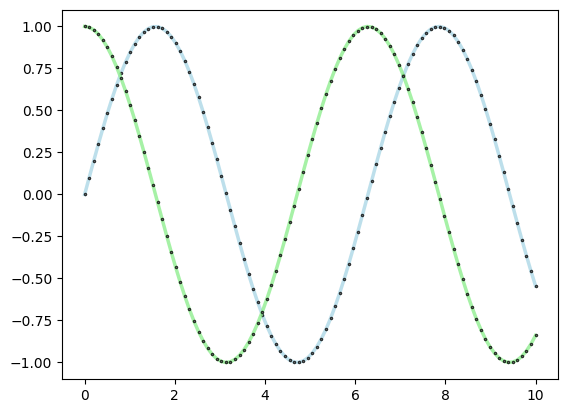

In [5]:
line_config = {
    'linewidth': 2.5,
    'linestyle': '-',
    'alpha': 0.8,
    'marker': '.',
    'markersize': 2,
    'markerfacecolor': 'white',
    'markeredgecolor': 'black',
    'markeredgewidth': 1.5,
    'color': 'lightblue',
}

plt.plot(x, y_sin, **line_config)

cos_config = line_config.copy()
cos_config.update({
    'color': 'lightgreen'
})

plt.plot(x, y_cos, **cos_config)

## Funktionen sind Objekte
In Python sind Funktionen Objekte - sie können wie jedes andere Objekt behandelt werden. Das bedeutet:

- Funktionen können Variablen zugewiesen werden
- Funktionen können als Parameter an andere Funktionen übergeben werden
- Funktionen können von anderen Funktionen zurückgegeben werden
- Funktionen haben Attribute und Methoden

In [6]:
def greet(name):
    """Eine einfache Begrüßungsfunktion"""
    return f"Hallo, {name}!"

# Funktionen haben Attribute
print(greet.__name__)        # greet
print(greet.__doc__)         # Eine einfache Begrüßungsfunktion
print(type(greet))           # <class 'function'>

# Funktionen können Variablen zugewiesen werden
say_hello = greet
print(say_hello("Anna"))     # Hallo, Anna!

# Funktionen können in Listen/Dictionaries gespeichert werden
functions = [greet, say_hello]
func_dict = {"greeting": greet}

greet
Eine einfache Begrüßungsfunktion
<class 'function'>
Hallo, Anna!


In [7]:
# Funktionen haben eine __call__-Methode die den Aufruf ermöglicht
greet.__call__("Alice")  # Aufruf der Funktion mit __call__

'Hallo, Alice!'

In [8]:
# Wir können eine eigene Klasse definieren, deren Objekte wie eine Funktion aufgerufen werden kann
class CallableClass:
    def __call__(self, name):
        return f"Hallo aus der Klasse, {name}!"
    
callable_object = CallableClass()
callable_object("Bob")  # Aufruf der Klasse wie eine Funktion

'Hallo aus der Klasse, Bob!'

## Closures

Eine **higher order function** ist eine Funktion, die mindestens eine der folgenden Eigenschaften hat:
- Sie nimmt eine oder mehrere Funktionen als Argumente.
- Sie gibt eine Funktion zurück.

Typische Beispiele für Higher Order Functions sind `map()`, `filter()` und `reduce()`. Aber auch `sorted()` und `max()` können als Higher Order Functions betrachtet werden, da sie eine Funktion als Schlüsselwortargument `key` akzeptieren um die Elemente vor dem Vergleich zu transformieren.


Ein **Closure** ist eine Funktion, die auf Variablen aus ihrem umgebenden Kontext (enclosing scope) zugreifen kann, auch wenn dieser Kontext nicht mehr aktiv ist. Closures werden häufig verwendet, um Zustände zu kapseln und Funktionen zu erstellen, die sich an vorherige Aufrufe erinnern.


In [9]:
def create_add_n(n):
    def add_n(x):
        return x + n
    return add_n

add_5 = create_add_n(5)

print(add_5(10))
print(add_5.__closure__)
print(add_5.__closure__[0].cell_contents)  # Zugriff auf die Variable n im Closure

15
(<cell at 0x000002BC5D6E7340: int object at 0x00007FF847A8FA38>,)
5


## Decorators
Ein **Decorator** ist ein Design-Pattern, bei dem eine Funktion eine andere Funktion modifiziert oder erweitert, ohne deren Quellcode zu ändern. Decorators werden häufig verwendet, um Funktionen zu protokollieren, zu überwachen oder zusätzliche Funktionalitäten hinzuzufügen.

In [10]:
def is_prime(n):
    '''A simple function to check if a number is prime.'''
    if n <= 1:
        return False
    return not any(n % i == 0 for i in range(2, n//2 + 1))

def log_function(func):
    def wrapper(n):
        print(f'Calling {func.__name__} with parameter {n}')
        return func(n)
    return wrapper


In [11]:
is_prime(14)

False

In [12]:
logged_is_prime = log_function(is_prime)

# call pure function
print(is_prime(17))

print("-"*20)
# call logged function
print(logged_is_prime(17))
    

True
--------------------
Calling is_prime with parameter 17
True


Unser Decorator funktioniert gerade nur dann, wenn die zu dekorierende Funktion genau ein Argument erwartet.
Wir können das Problem lösen, indem wir *args und **kwargs in der inneren Funktion verwenden.
Das bedeutet, dass die dekorierte Funktion beliebig viele Argumente akzeptieren kann. Hier ist der aktualisierte Code:


In [13]:
def log_function(func):
    def wrapper(*args, **kwargs):
        print(f'Calling {func.__name__} with parameters {args} and {kwargs}')
        return func(*args, **kwargs)
    return wrapper

In [14]:
is_prime_logged = log_function(is_prime)

print(is_prime_logged(17))

Calling is_prime with parameters (17,) and {}
True


In [15]:
def filter_primes(*numbers):
    return [n for n in numbers if is_prime(n)]

print(filter_primes(4, 6, 9, 17, 18, 19, 22, 23))

print("-"*20)	    

filter_primes_logged = log_function(filter_primes)

print(filter_primes_logged(4, 6, 9, 17, 18, 19, 22, 23))

[17, 19, 23]
--------------------
Calling filter_primes with parameters (4, 6, 9, 17, 18, 19, 22, 23) and {}
[17, 19, 23]


Python bietet uns eine weitere Möglichkeit an um Funktionen direkt bei der Definition zu dekorieren.
Hierfür wird das @-Zeichen verwendet. Anstatt

```python
decorated_function = decorator_function(original_function)
```

Zu schreiben können wir auch einfach
```python
@decorator_function
def original_function():
    pass
```
bei der Funktionsdefinition Verwenden.

Hier nochmal beide Funktionen zusammen:

In [16]:
def log_function(func):
    def wrapper(*args, **kwargs):
        print(f'Calling {func.__name__} with parameter {args} and {kwargs}')
        result = func(*args, **kwargs)
        return result
    return wrapper

@log_function
def is_prime(n):
    '''A simple function to check if a number is prime.'''
    if n <= 1:
        return False
    return not any(n % i == 0 for i in range(2, n))

In [17]:
print(is_prime(17))

Calling is_prime with parameter (17,) and {}
True


Da unsere Funktion durch diese syntax überschrieben wird ergeibt sich ein Problem:
Möchten wir eigenschaften der Funktion abfrage, wie den Namen oder den Docstring, werden uns nun die Eigenschaften unserer wrapper Funktion zurückgegeben.

In [18]:
print(is_prime.__name__)
print(is_prime.__doc__)

wrapper
None


Um dieses Problem zu beheben, können wir direkt einen decorator aus dem functools Modul aus der Standard Bibliothek von Python benutzen.

In [19]:
from functools import wraps

def log_function(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f'Calling func with parameter {args} and {kwargs}')
        result = func(*args, **kwargs)
        return result
    return wrapper

@log_function
def is_prime(n):
    '''A simple function to check if a number is prime.'''
    if n <= 1:
        return False
    return not any(n % i == 0 for i in range(2, n))

In [20]:
print(is_prime.__name__)
print(is_prime.__doc__)

is_prime
A simple function to check if a number is prime.


In [21]:
from functools import update_wrapper

class CountCalls:
    """Zählt Funktionsaufrufe"""
    
    def __init__(self, func):
        self.func = func
        self.count = 0
        update_wrapper(self, func) # damit die Metadaten der Funktion erhalten bleiben
    
    def __call__(self, *args, **kwargs):
        self.count += 1
        return self.func(*args, **kwargs)
    
    def get_count(self):
        return self.count

@CountCalls
def fibonacci(n):
    """Berechnet die n-te Fibonacci-Zahl"""
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

# Testen
print(fibonacci(5))  # 5
print(f"Gesamtanzahl Aufrufe: {fibonacci.get_count()}")

5
Gesamtanzahl Aufrufe: 15


# Property decorator

In [22]:
# demonstrate the property decorator

class B():
    
    def __init__(self, x):
        self._x = x
        
    @property
    def x(self):
        return self._x
    
    @x.setter
    def x(self, value):
        if value < 0:
            raise ValueError("x must be positive")
        self._x = value
        
        
b = B(5)
print(b.x)
b.x = 10
print(b.x)

# b.x = -1



5
10


In [23]:
import math

class Circle:
    """Repräsentiert einen Kreis"""
    
    def __init__(self, radius):
        self._radius = radius  # Privates Attribut
    
    @property
    def radius(self):
        """Getter für den Radius"""
        return self._radius
    
    @radius.setter
    def radius(self, value):
        """Setter für den Radius mit Validierung"""
        if value <= 0:
            raise ValueError("Radius muss positiv sein")
        self._radius = value
    
    @property
    def area(self):
        """Berechnet die Fläche (read-only Property)"""
        return math.pi * self._radius ** 2
    
    @property
    def circumference(self):
        """Berechnet den Umfang (read-only Property)"""
        return 2 * math.pi * self._radius

# Verwendung
circle = Circle(5)
print(f"Radius: {circle.radius}")           # 5
print(f"Fläche: {circle.area:.2f}")         # 78.54
print(f"Umfang: {circle.circumference:.2f}") # 31.42

# Radius ändern
circle.radius = 3
print(f"Neue Fläche: {circle.area:.2f}")    # 28.27

# Validierung testen
try:
    circle.radius = -1  # Fehler!
except ValueError as e:
    print(f"Fehler: {e}")

Radius: 5
Fläche: 78.54
Umfang: 31.42
Neue Fläche: 28.27
Fehler: Radius muss positiv sein


In [24]:
from datetime import date

class Person:
    def __init__(self, birth_date, death_date=None):
        self._birth_date = birth_date
        self._death_date = death_date

    @property
    def birth_date(self):
        """Get the birth date of the person."""
        return self._birth_date

    @property
    def death_date(self):
        """Get the death date of the person, if applicable."""
        return self._death_date

    @death_date.setter
    def death_date(self, value):
        """Set the death date of the person."""
        if value < self._birth_date:
            raise ValueError("Death date cannot be before birth date")
        self._death_date = value

    @property
    def age(self):
        """Calculate the age of the person based on birth and death date."""
        end_date = self._death_date if self._death_date else date.today()
        return end_date.year - self._birth_date.year - (
            (end_date.month, end_date.day) < (self._birth_date.month, self._birth_date.day)
        )

# Example usage
person = Person(date(1990, 5, 15))
print(f"Birth Date: {person.birth_date}")
print(f"Current Age: {person.age}")

# Set a death date
person.death_date = date(2020, 5, 14)
print(f"Death Date: {person.death_date}")
print(f"Age at Death: {person.age}")

try:
    person.death_date = date(1980, 5, 14)
except ValueError as e:
    print(f"Fehler: {e}")


Birth Date: 1990-05-15
Current Age: 35
Death Date: 2020-05-14
Age at Death: 29
Fehler: Death date cannot be before birth date


# Classmethod und Staticmethod

Python bietet vier verschiedene Methodentypen, die sich in ihrem Zugriff auf Klassen- und Instanzdaten unterscheiden. Diese Methodentypen ermöglichen es, verschiedene Funktionalitäten je nach Anwendungsfall optimal zu implementieren.

• **Einfache Methode** - Eine normale Funktion innerhalb einer Klasse ohne automatische Parameter, die nur über die Klasse selbst aufgerufen werden kann

• **Instanzmethode** - Die Standard-Methode mit `self`-Parameter, die auf spezifische Objektinstanzen und deren Attribute zugreift

• **Statische Methode** - Eine unabhängige Methode mit `@staticmethod`-Decorator, die weder auf Instanz- noch Klassendaten zugreift und sowohl über Klasse als auch Instanz aufrufbar ist

• **Klassenmethode** - Eine Methode mit `@classmethod`-Decorator und `cls`-Parameter, die auf Klassendaten zugreift und oft für alternative Konstruktoren verwendet wird

In [25]:
class A:
    
    # method
    def m1():
        print("m1 of A called")
    
    # instance method
    def m2(self):
        print("m2 of A called with self", self)
        
    @staticmethod
    def m3():
        print("m3 of A called")
        
    @classmethod
    def m4(cls):
        print("m4 of A called with cls", cls)
        
        
a = A()


# a.m1()
a.m2()
a.m3()
a.m4()

print("-"*20)

A.m1()
A.m2(a)
A.m3()
A.m4()

m2 of A called with self <__main__.A object at 0x000002BC5E729D30>
m3 of A called
m4 of A called with cls <class '__main__.A'>
--------------------
m1 of A called
m2 of A called with self <__main__.A object at 0x000002BC5E729D30>
m3 of A called
m4 of A called with cls <class '__main__.A'>


# lru_cache

In [26]:
from functools import lru_cache

# Define a Fibonacci function with caching
@lru_cache(maxsize=None)  # maxsize=None means unlimited cache size
def fibonacci(n):
    """Return the nth Fibonacci number."""
    if n < 2:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

# Example usage
print(fibonacci(10))  # Output: 55
print(fibonacci(20))  # Output: 6765

# Calling fibonacci(10) again will use the cached result
print(fibonacci(10))  # Output: 55 (retrieved from cache)


55
6765
55


# Data Class

In [27]:
from dataclasses import dataclass

@dataclass
class Point:
    x: float
    y: float

# Creating an instance of Point
point1 = Point(1.5, 2.5)
print(point1)  # Output: Point(x=1.5, y=2.5)

# Accessing fields
print(point1.x)  # Output: 1.5
print(point1.y)  # Output: 2.5

# Comparing instances
point2 = Point(1.5, 2.5)
print(point1 == point2)  # Output: True

# Modifying fields
point1.x = 3.0
print(point1)  # Output: Point(x=3.0, y=2.5)


Point(x=1.5, y=2.5)
1.5
2.5
True
Point(x=3.0, y=2.5)
